# Julia Sets 2

### Sean Paradiso

In [5]:
# Math libraries
import numpy as np
from math import sqrt

# Matplotlib plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Bokeh plotting libraries
import bokeh.plotting as blt
blt.output_notebook()

In [6]:
import math
import numpy as np

class JuliaSet(object):
    def __init__(self, c, n = 100):
        self.c = c
        self.n = n
        self._d = 0.001
        self._complexplane = np.array([])
        self.set = np.array([])
        
    def juliamap(self, z):
        return (z ** 2) + self.c
    
    def iterate(self, z):
        m = 0
        while True:
            z = self.juliamap(z)
            m += 1
            if  abs(z) > 2:
                return m
            if m >= self.n:
                return 0
       
    def makeplane(self):
        #self.a = np.arange(-2, 2, self._d)
        #self._complex = self.a[:,np.newaxis] + self.a[np.newaxis,:] * 1
        plane = [i * self._d for i in range(int(-2 / self._d), int(2 / self._d), 1)]
        self._complexplane=[complex(x,y) for x in plane for y in plane]

    def set_spacing(self, d):
        self._d = d
        self.makeplane()
        return self._complexplane

    def generate(self):
        self.set = [self.iterate(i) for i in self._complexplane]
        return self.set
    
    

In [7]:
class JuliaSetPlot(JuliaSet):
    """Extend JuliaSet to add plotting functionality"""
    
    def __init__(self, *args, **kwargs):
        # Invoke constructor for JuliaSet first, unaltered
        super(JuliaSetPlot, self).__init__(*args, **kwargs)
        # Add one more attribute: a rendered image array
        self.img = np.array([])
    
    def get_dim(self):
        # get what should be an attribute
        return int(4.0 / self._d)
    
    def render(self):
        if not self.set: self.generate()
        # Convert inefficient list to efficient numpy array
        self.img = np.array(self.set)
        dim = self.get_dim()
        # Reshape array into a 2d complex plane
        self.img = np.reshape(self.img, (dim,dim)).T
        
    def show(self):
        if not self.img.size: self.render()
        # Specify complex plane axes efficiently
        xy = np.linspace(-2,2,self.get_dim())
        # Use matplotlib to plot image as an efficient mesh
        plt.figure(1, figsize=(12,9))
        plt.pcolormesh(xy,xy,self.img, cmap=plt.cm.hot)
        plt.colorbar()
        plt.show()
        
    def interact(self):
        from matplotlib.colors import rgb2hex
        if not self.img.size: self.render()
        # Mimic matplotlib "hot" color palette
        colormap = plt.cm.get_cmap("hot")
        bokehpalette = [rgb2hex(m) for m in colormap(np.arange(colormap.N))]
        # Use bokeh to plot an interactive image
        f = blt.figure(x_range=[-2,2], y_range=[-2,2], plot_width=600, plot_height=600)
        f.image(image=[j.img], x=[-2,2], y=[-2,2], dw=[4], dh=[4], palette=bokehpalette)
        blt.show(f)

##### The initial, non-numpy, code took 0.060 seconds and when we introduced numpy we achieve 0.034 seconds on just the code without the plotting tools (roughly twice as fast as the non-numpy version) and 0.054 seconds with the implementation of the plotting tools.

CPU times: user 204 ms, sys: 20 ms, total: 224 ms
Wall time: 886 ms


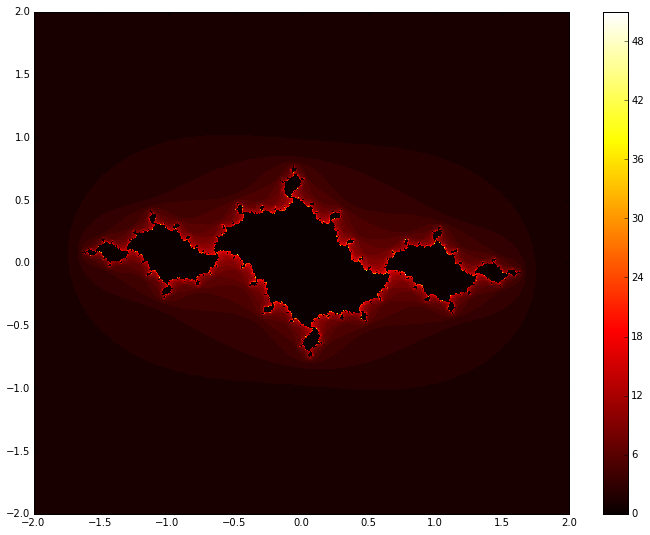

CPU times: user 5.37 s, sys: 1.52 s, total: 6.89 s
Wall time: 24.4 s


In [8]:
j = JuliaSetPlot(-1.037 + 0.17j)
%time j.set_spacing(0.006)
%time j.show()

In [9]:
j = JuliaSetPlot(-0.624 + 0.435j)
%time j.set_spacing(0.006)
%time j.interact()

ERROR:/projects/sage/sage-6.9/local/lib/python2.7/site-packages/bokeh/validation/check.py:E-1000 (COLUMN_LENGTHS): ColumnDataSource column lengths are not all the same: ColumnDataSource, ViewModel:ColumnDataSource, ref _id: 5cd93843-2e54-42d2-8f88-46c1255babbf


CPU times: user 188 ms, sys: 16 ms, total: 204 ms
Wall time: 992 ms


CPU times: user 5.07 s, sys: 84 ms, total: 5.15 s
Wall time: 10.5 s


In [10]:
%prun j.generate()

In [11]:
%load_ext line_profiler
%lprun -f j.generate j.generate()